
Loading analysis modules...
✓ All modules loaded

Found 3 project directories.

▶ Processing project: 10-1-2024_#6_INDIVIDUAL_[15]
  ✓ Loaded existing CSV: processed_data.csv (48481 rows)
  Running pose clustering...

INTEGRATED POSE CLUSTERING & CLINICAL ANALYSIS PIPELINE

[1/4] Loading and preprocessing data...
Loaded 48481 rows, 57 columns
Participants found: ['Therapist', 'Child']

[2/4] Analyzing clinical interactions...


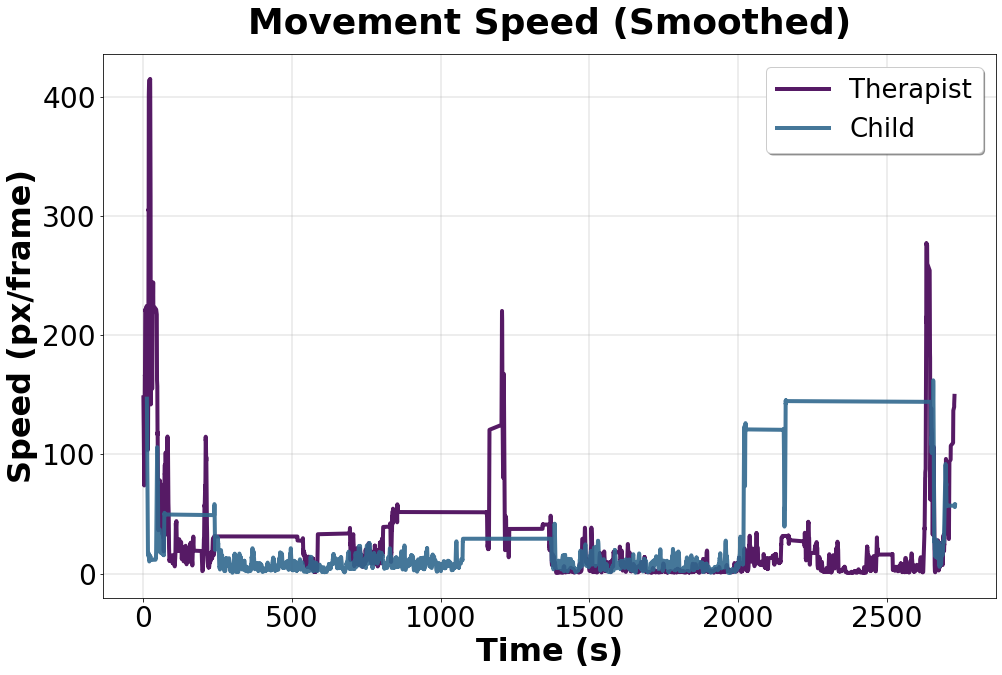

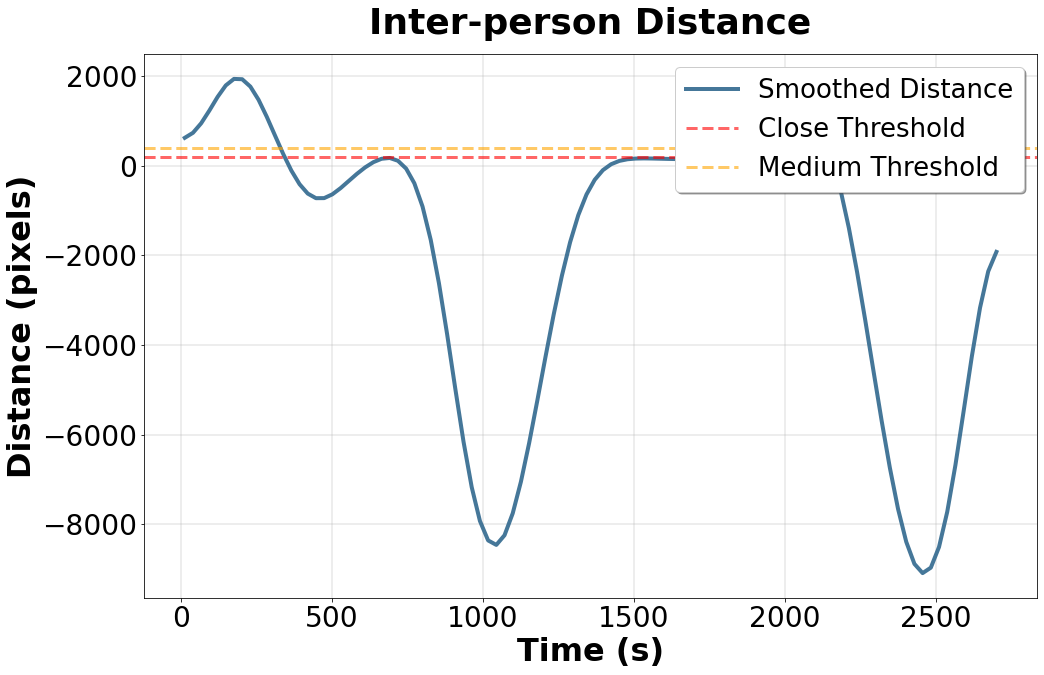

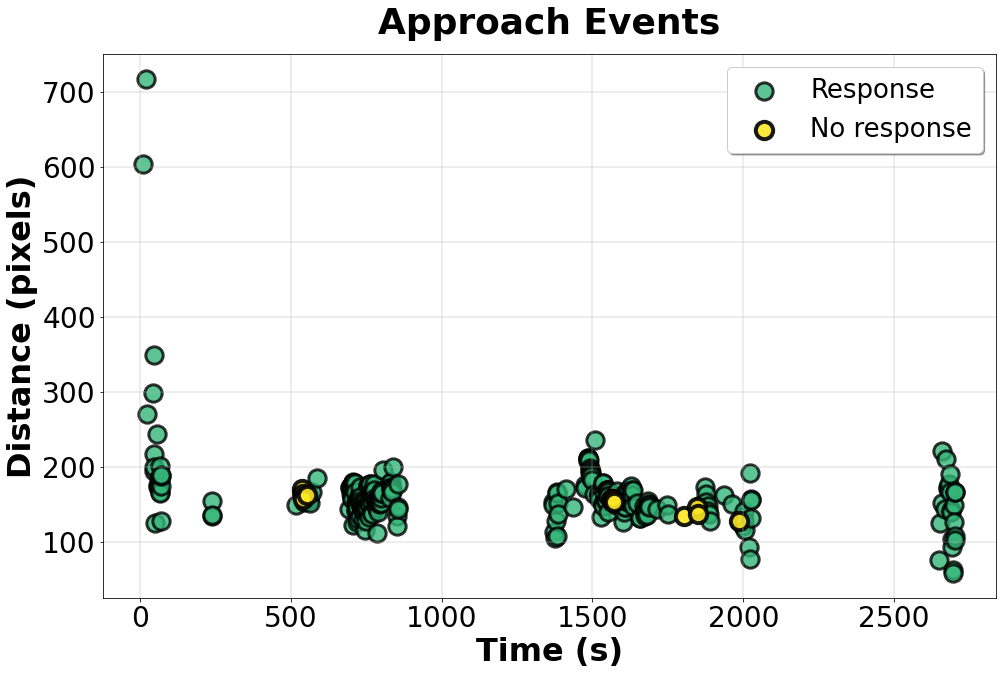

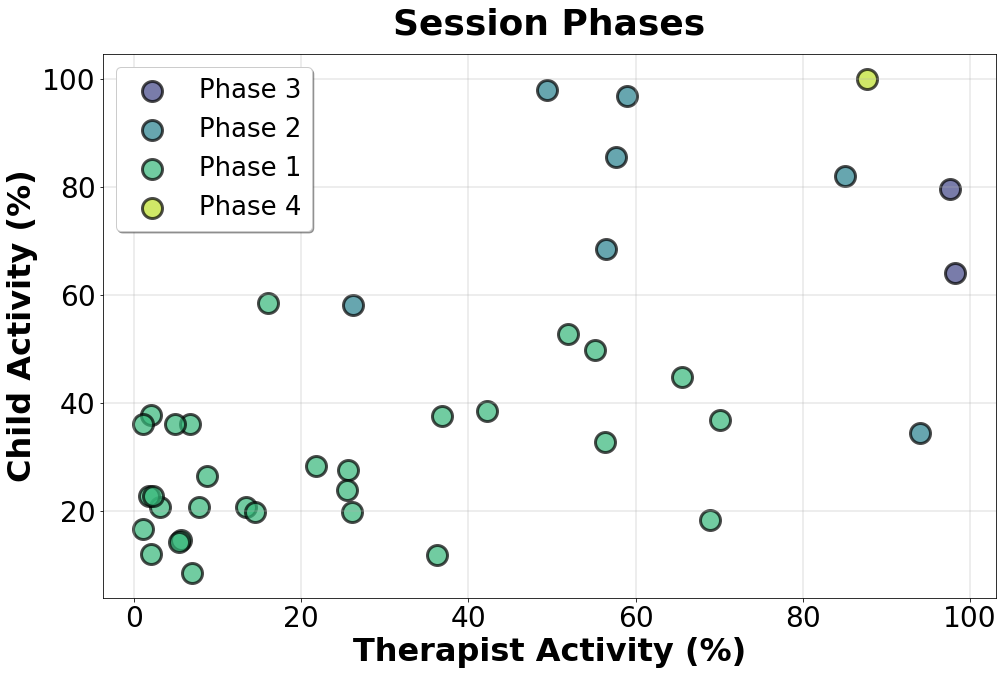


[3/4] Clustering pose patterns...
  Found persons: Child, Therapist
  → Analyzing Child...


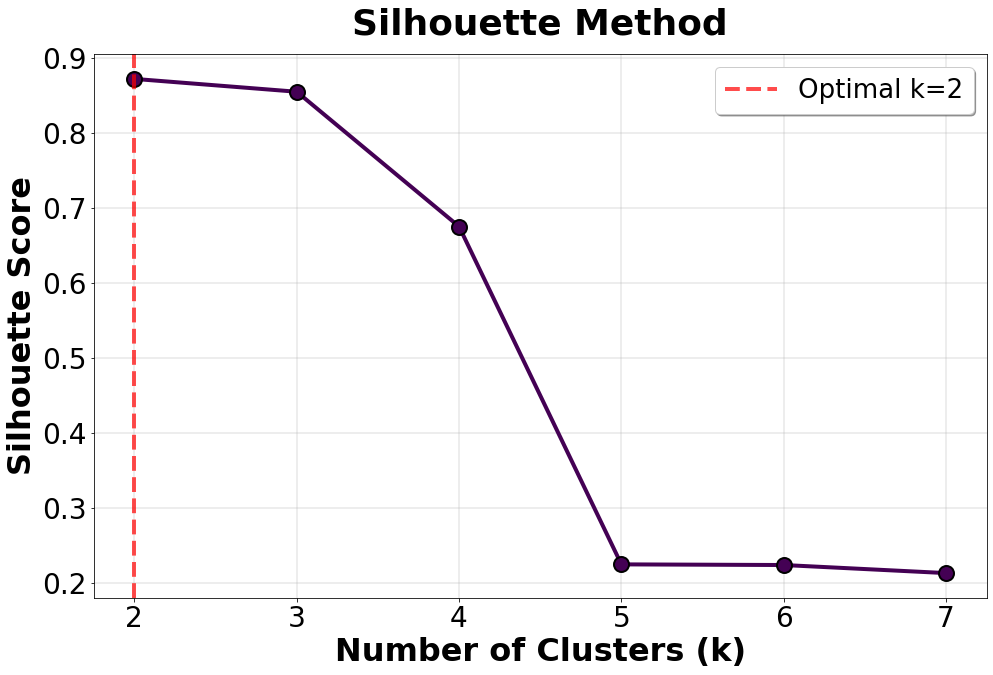

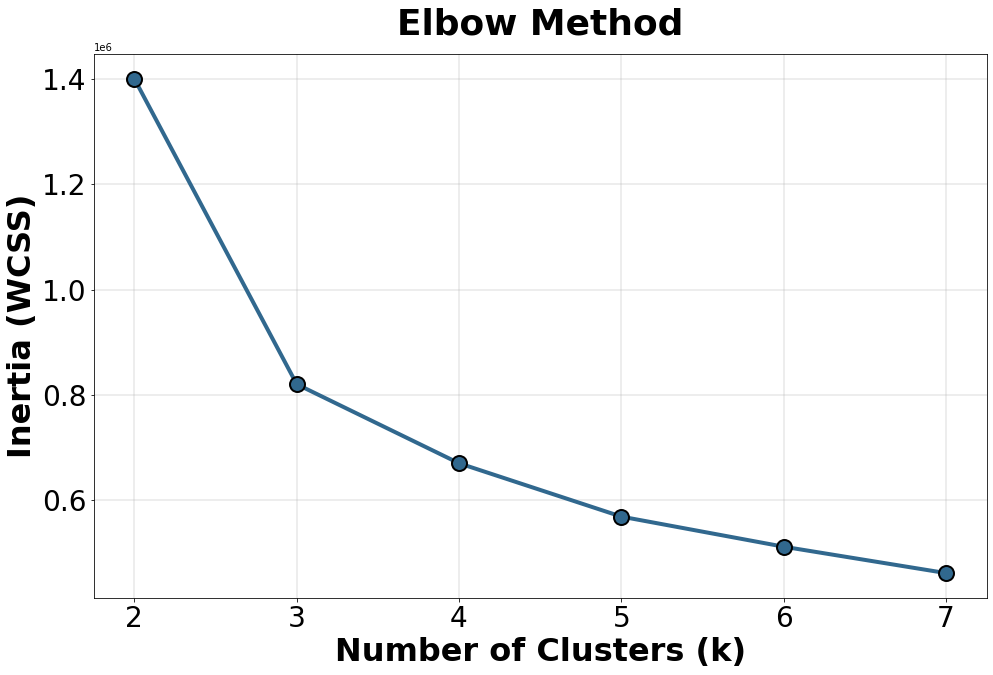

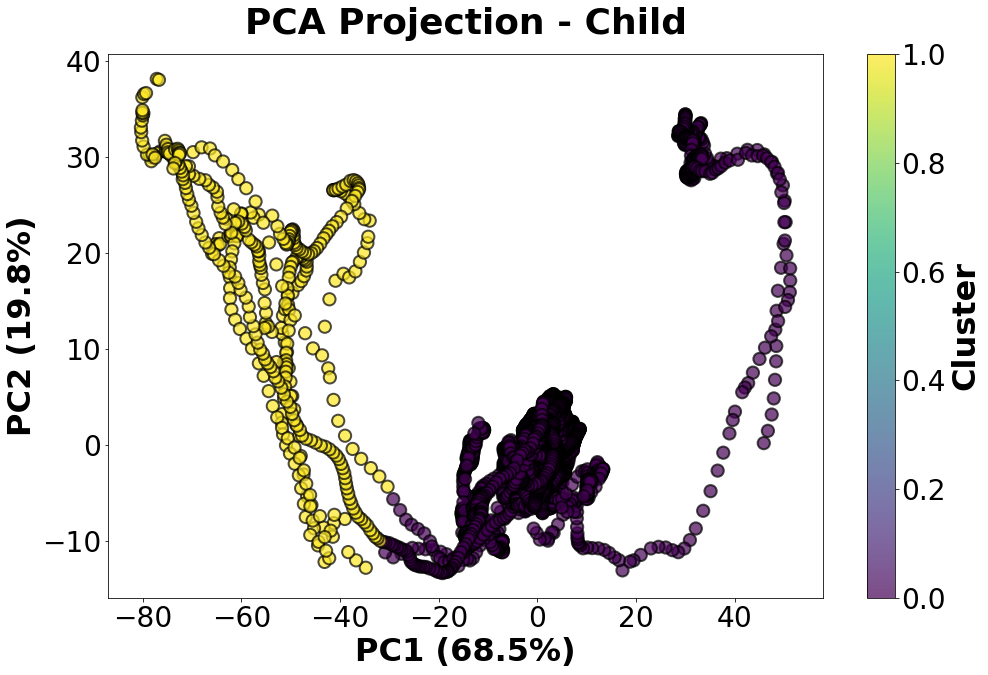

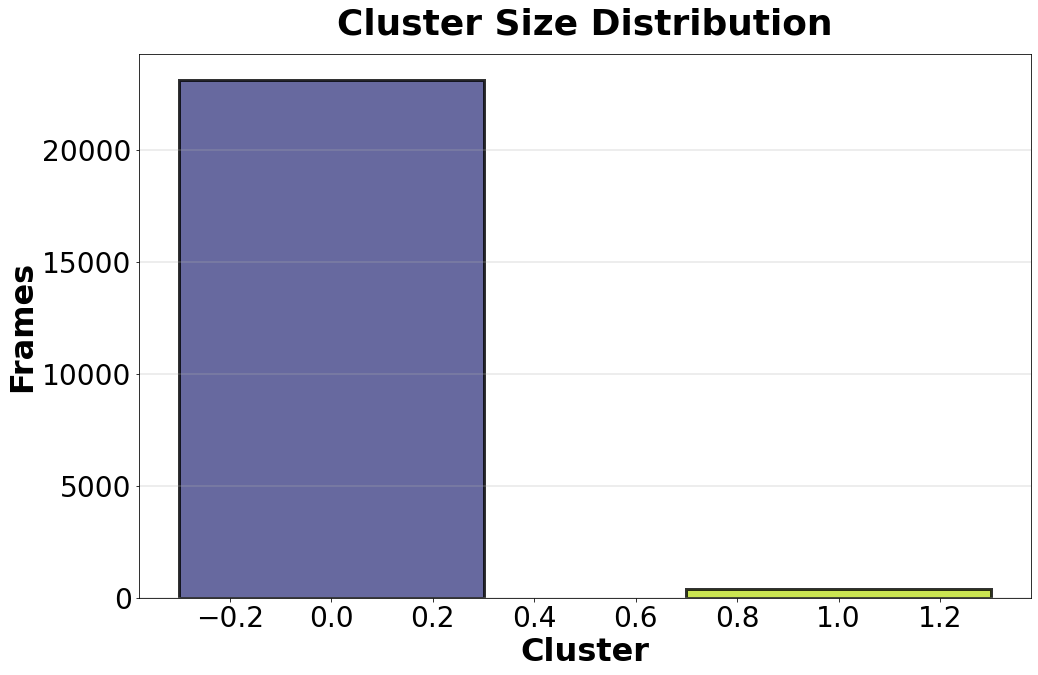

  → Analyzing Therapist...


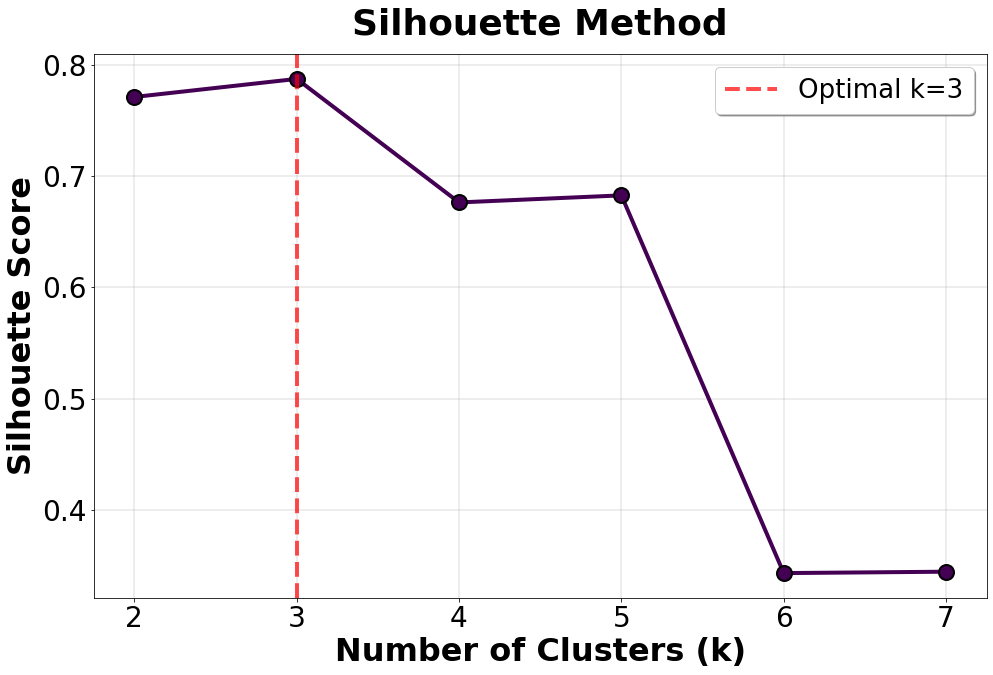

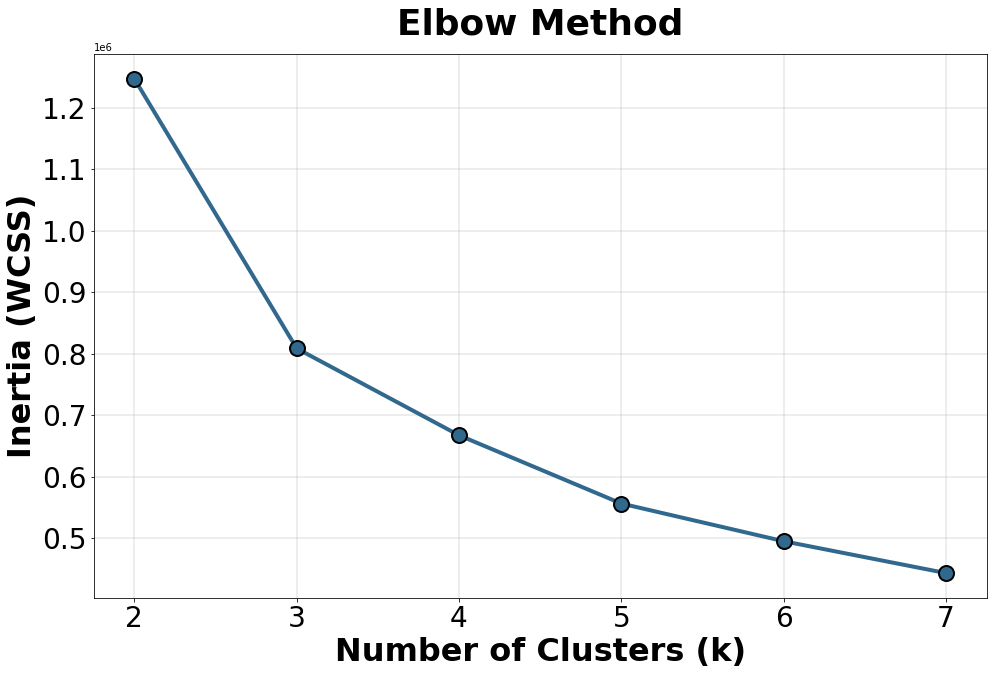

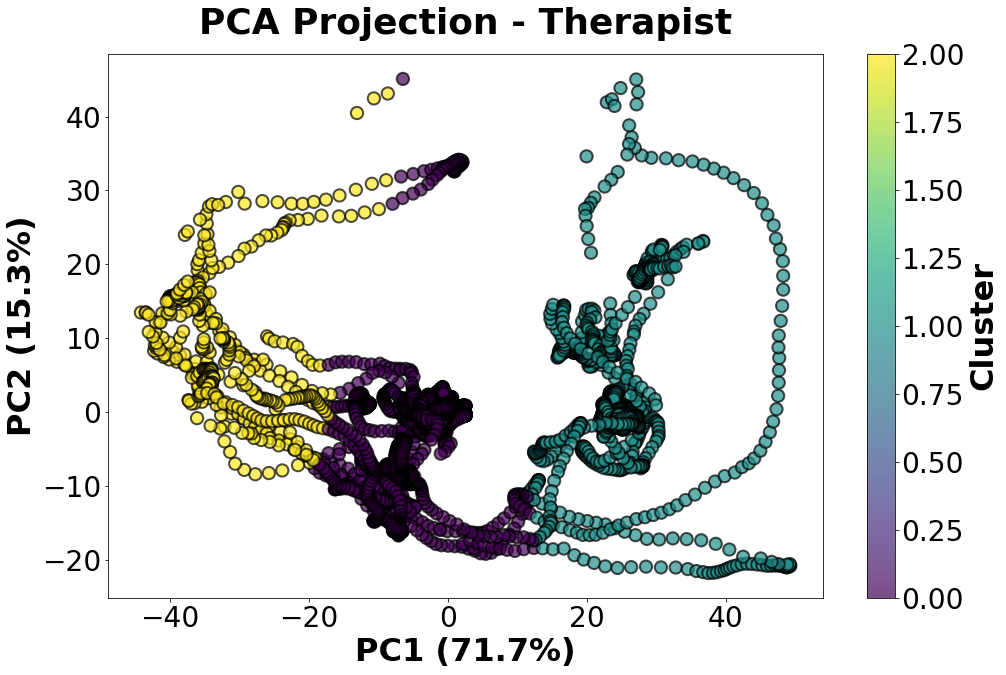

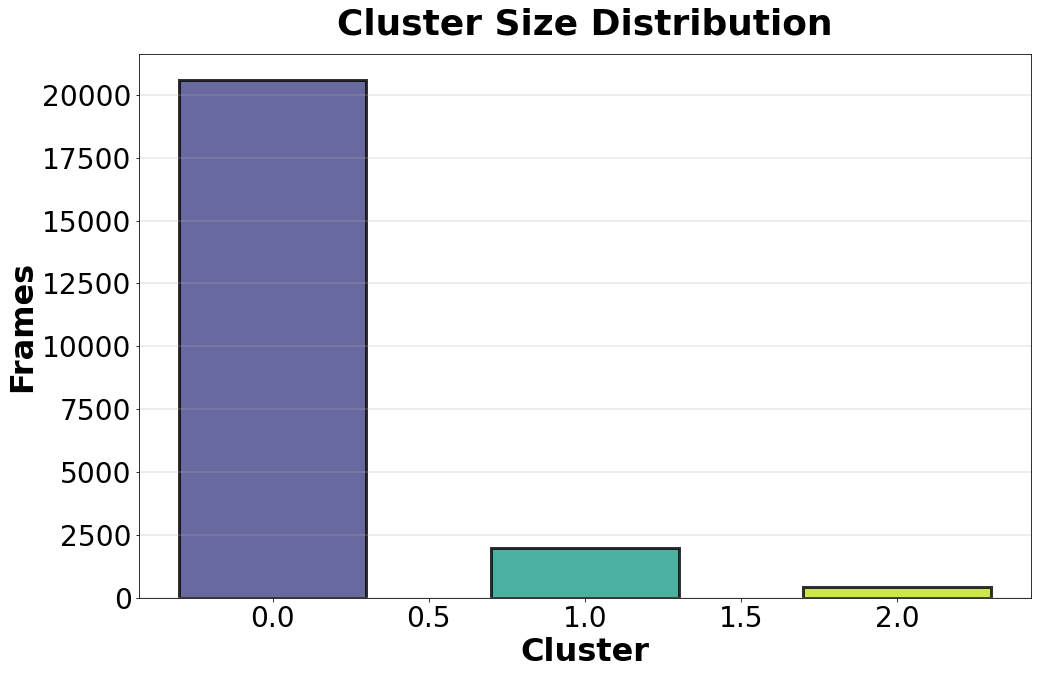


[4/4] Generating results...

ANALYSIS COMPLETE - KEY FINDINGS

Dataset: 46,494 frames analyzed

Movement Profiles:
  • Therapist: 30.5% active (mean speed: 16.6 px/frame)
  • Child: 30.9% active (mean speed: 10.8 px/frame)

Proximity: 151 px average distance (97.9% close)

Responsiveness: 94.6% (282/298 approaches)
   Mean response latency: 0.68s

Movement Coupling: r = 0.284 at -1.6s lag

Pose Clusters:
  • Child: 2 distinct posture patterns (silhouette score: 0.872)
  • Therapist: 3 distinct posture patterns (silhouette score: 0.787)

  ✓ Pose clustering completed and saved.
  → Skipping annotation processing per flag.

▶ Processing project: 11-1-2024_#7_INDIVIDUAL_[14]
  ✓ Loaded existing CSV: processed_data.csv (45984 rows)
  Running pose clustering...

INTEGRATED POSE CLUSTERING & CLINICAL ANALYSIS PIPELINE

[1/4] Loading and preprocessing data...
Loaded 45984 rows, 57 columns
Participants found: ['Therapist', 'Child']

[2/4] Analyzing clinical interactions...


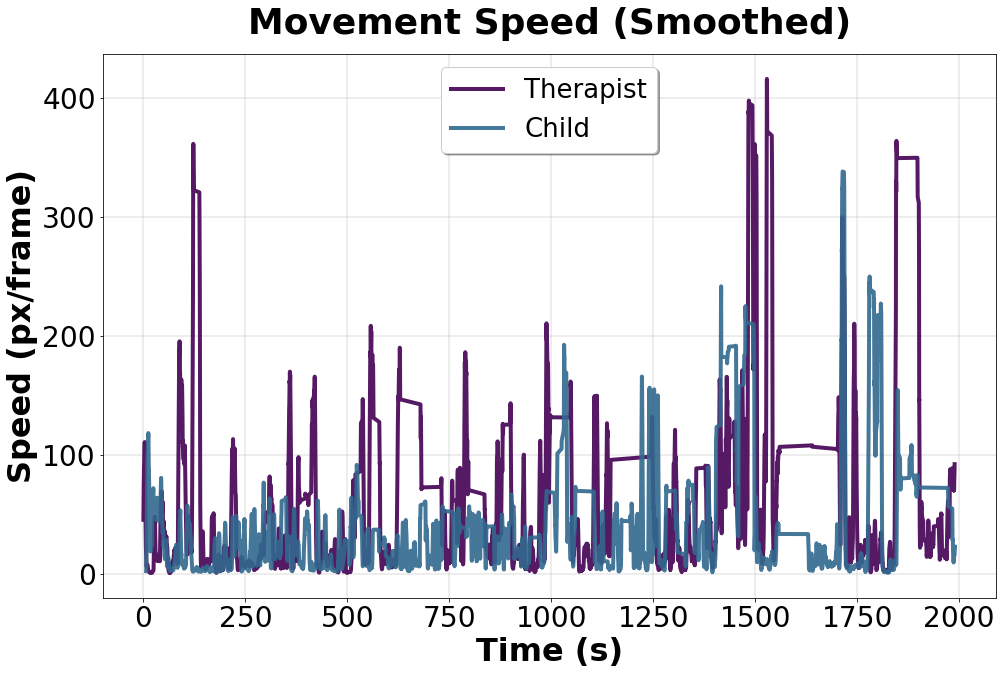

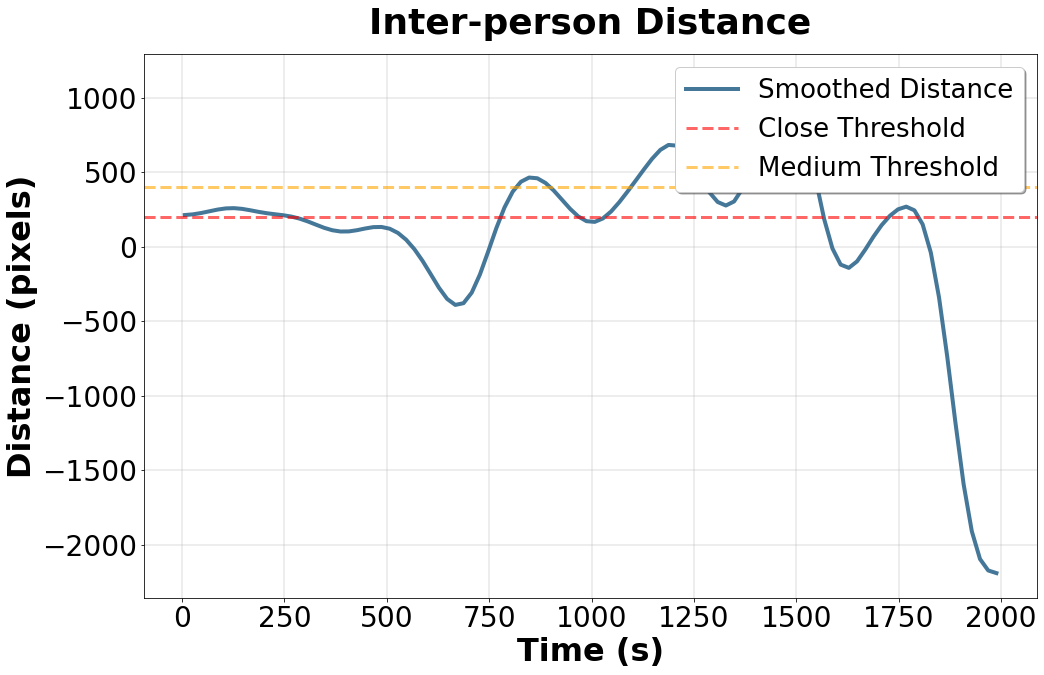

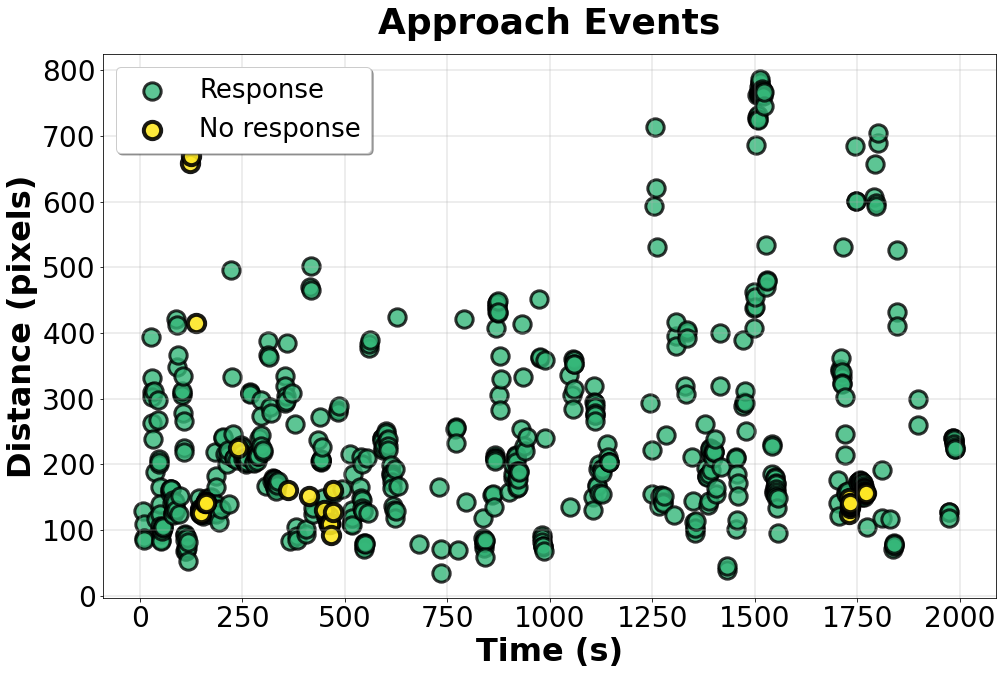

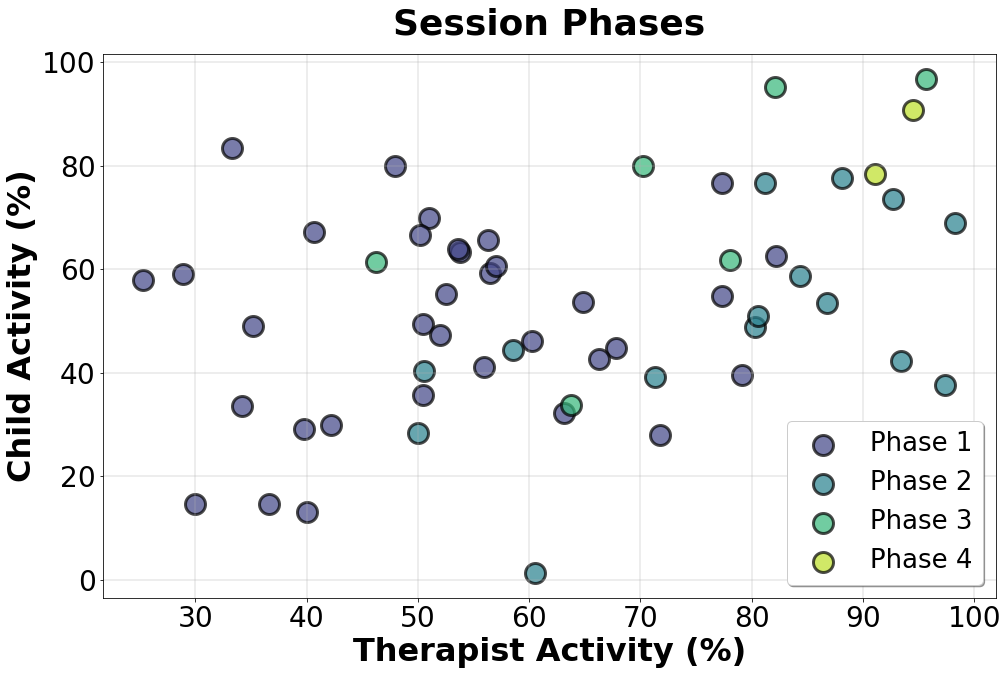


[3/4] Clustering pose patterns...
  Found persons: Child, Therapist
  → Analyzing Child...


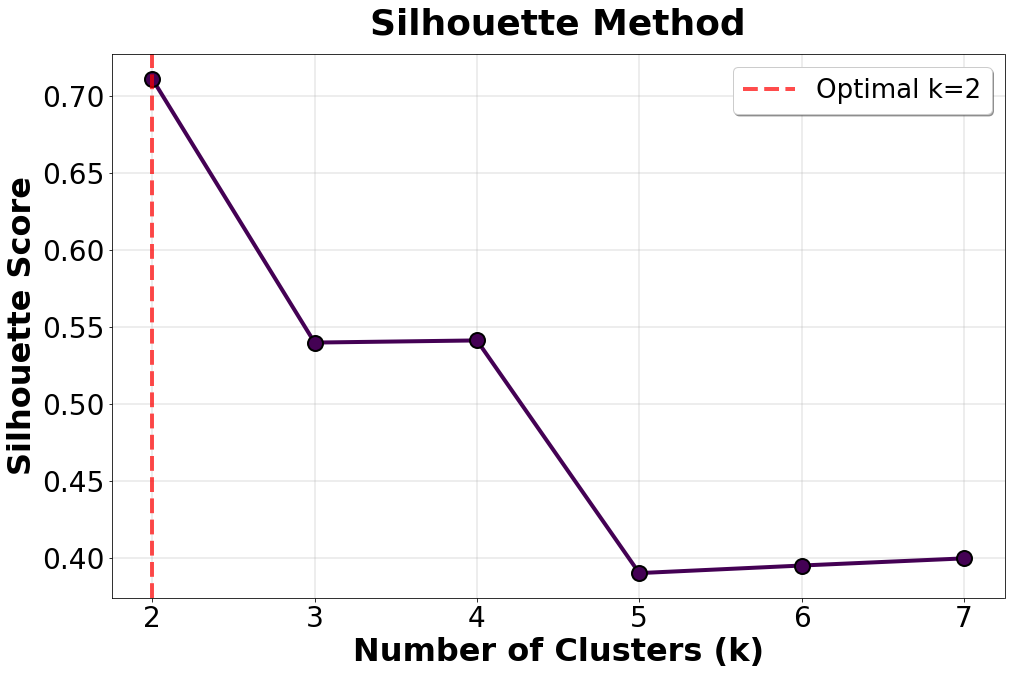

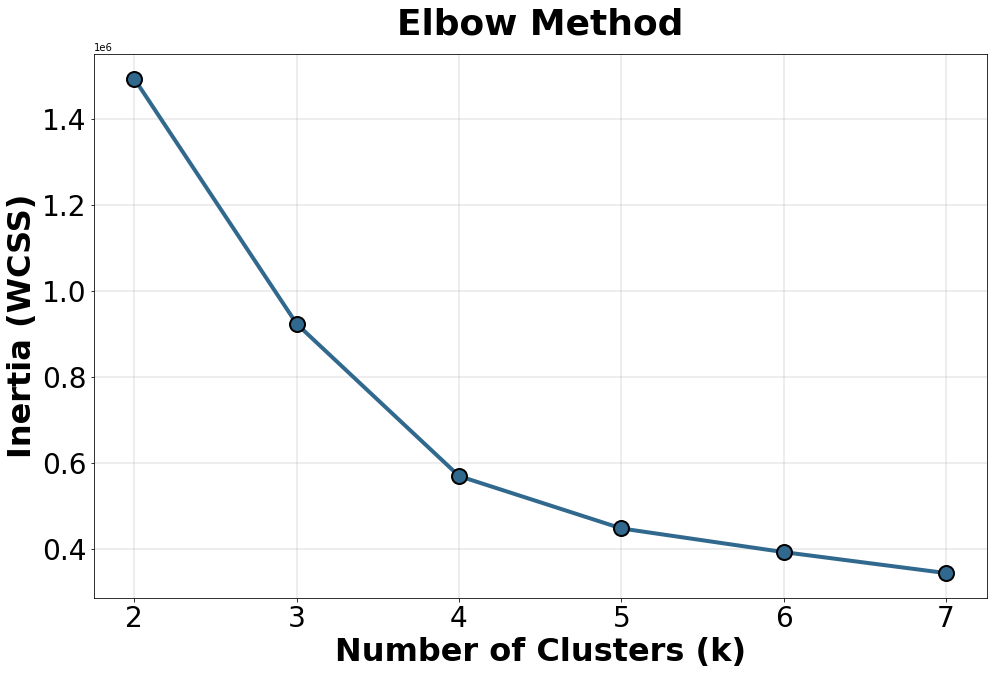

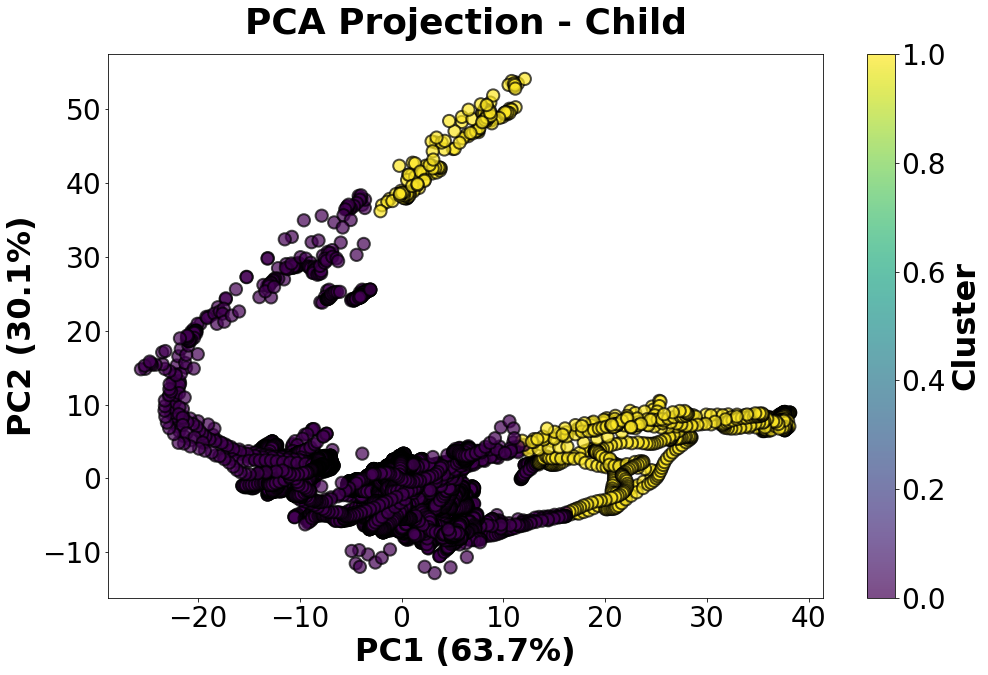

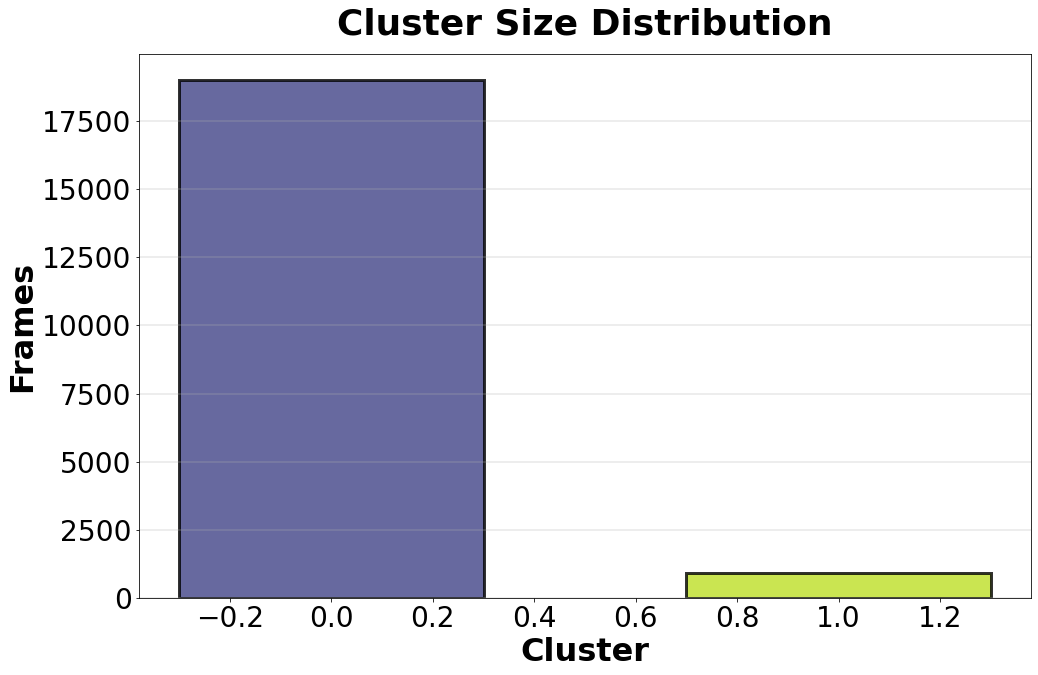

  → Analyzing Therapist...


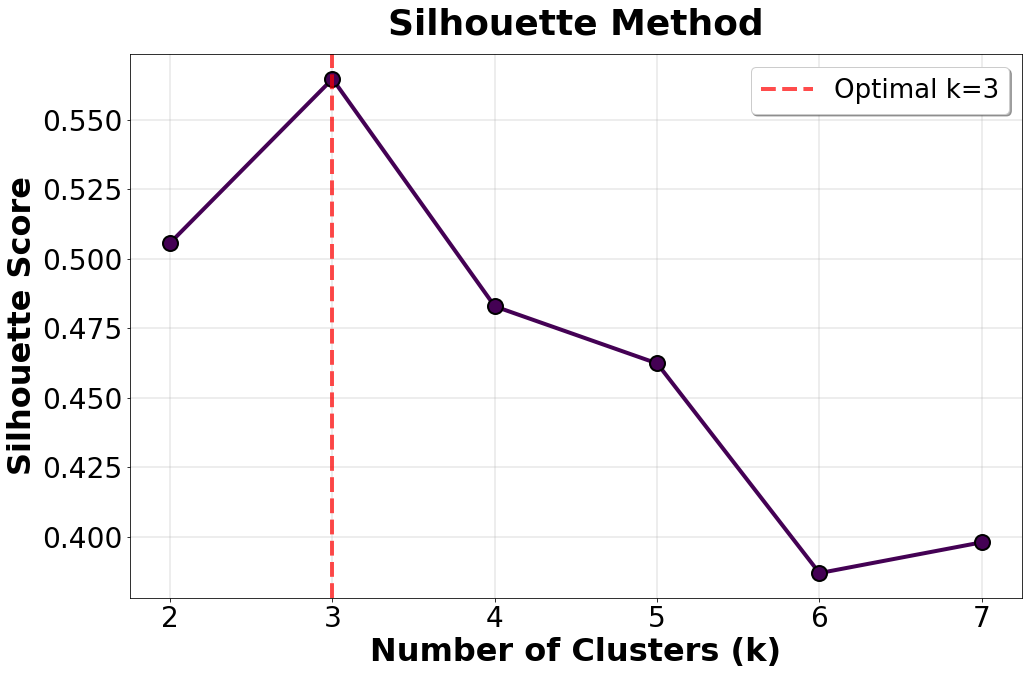

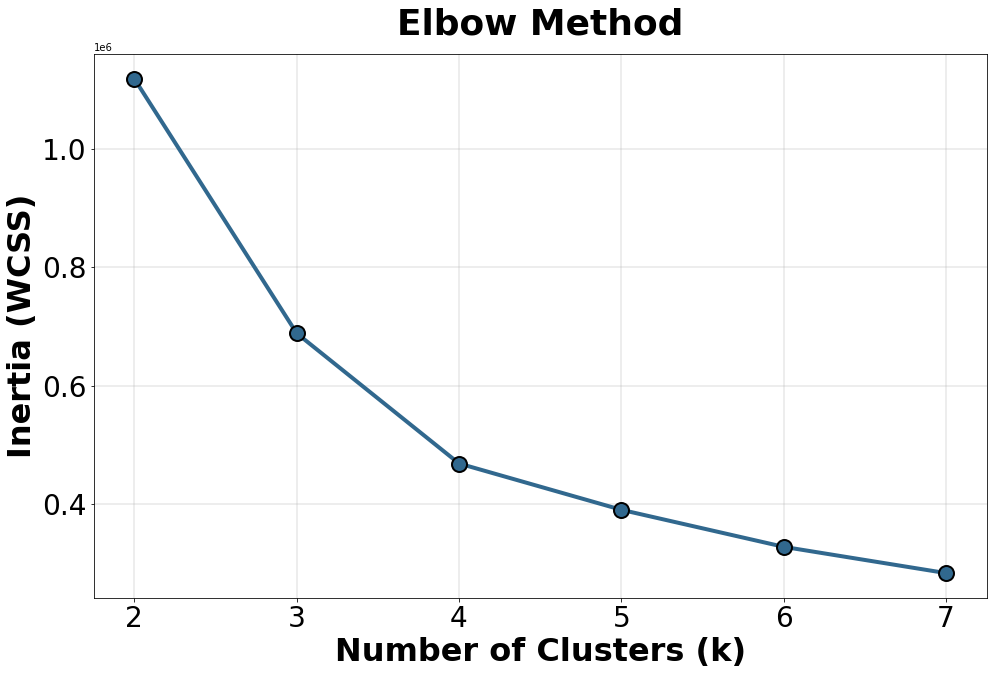

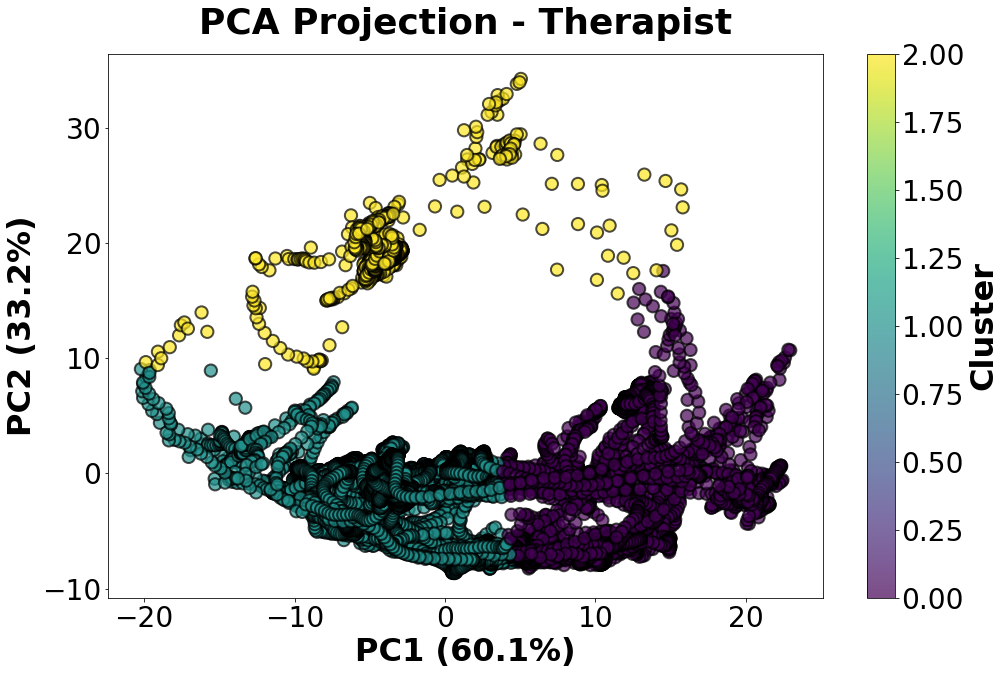

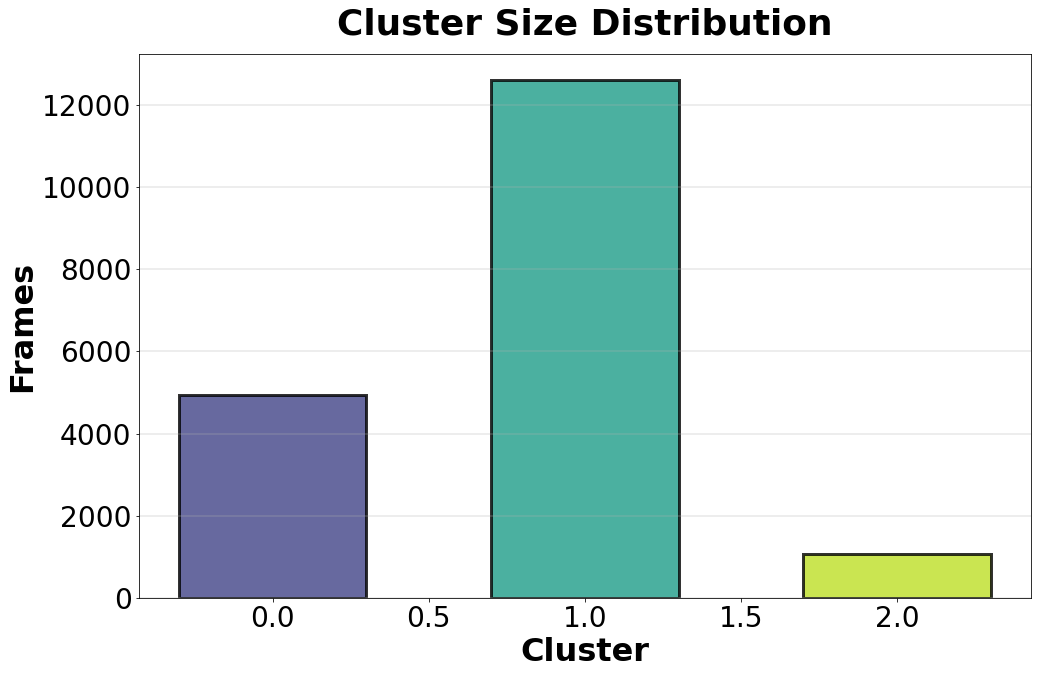


[4/4] Generating results...

ANALYSIS COMPLETE - KEY FINDINGS

Dataset: 38,554 frames analyzed

Movement Profiles:
  • Therapist: 59.4% active (mean speed: 43.4 px/frame)
  • Child: 47.9% active (mean speed: 27.0 px/frame)

Proximity: 222 px average distance (54.5% close)

Responsiveness: 94.2% (556/590 approaches)
   Mean response latency: 0.46s

Movement Coupling: r = 0.087 at -0.5s lag

Pose Clusters:
  • Child: 2 distinct posture patterns (silhouette score: 0.711)
  • Therapist: 3 distinct posture patterns (silhouette score: 0.565)

  ✓ Pose clustering completed and saved.
  → Skipping annotation processing per flag.

▶ Processing project: 11-1-2024_#9_INDIVIDUAL_[18]
  ✓ Loaded existing CSV: processed_data.csv (42853 rows)
  Running pose clustering...

INTEGRATED POSE CLUSTERING & CLINICAL ANALYSIS PIPELINE

[1/4] Loading and preprocessing data...
Loaded 42853 rows, 57 columns
Participants found: ['Therapist', 'Child']

[2/4] Analyzing clinical interactions...


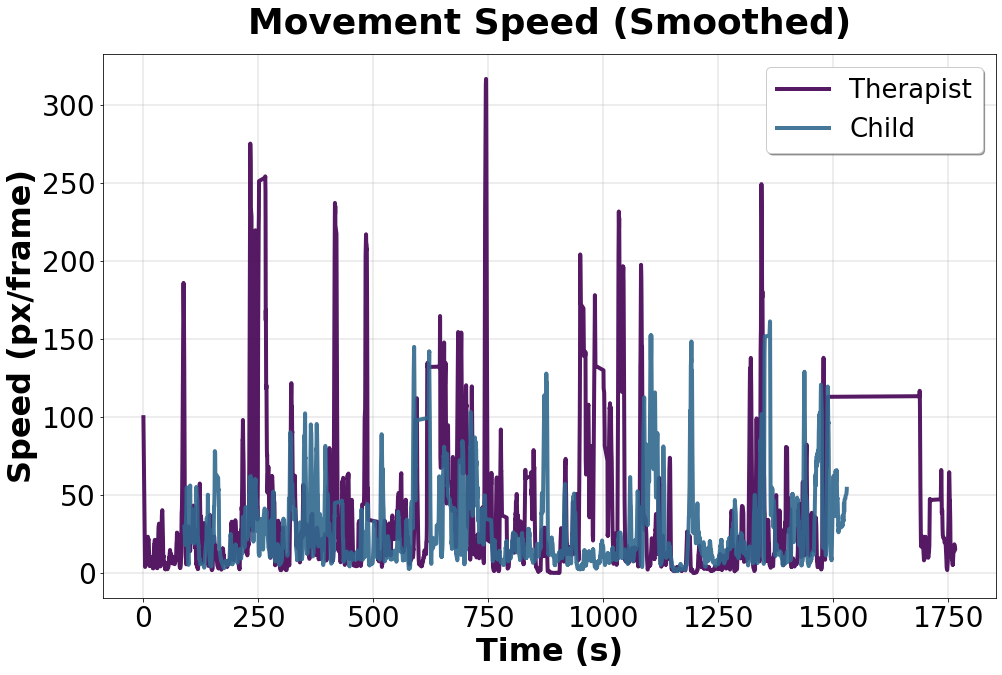

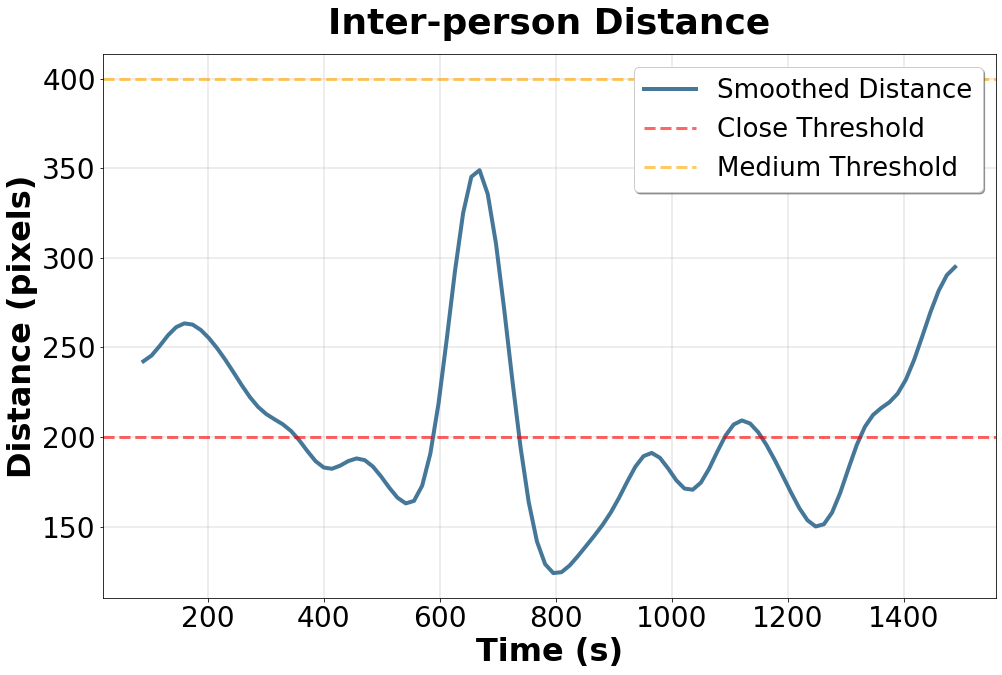

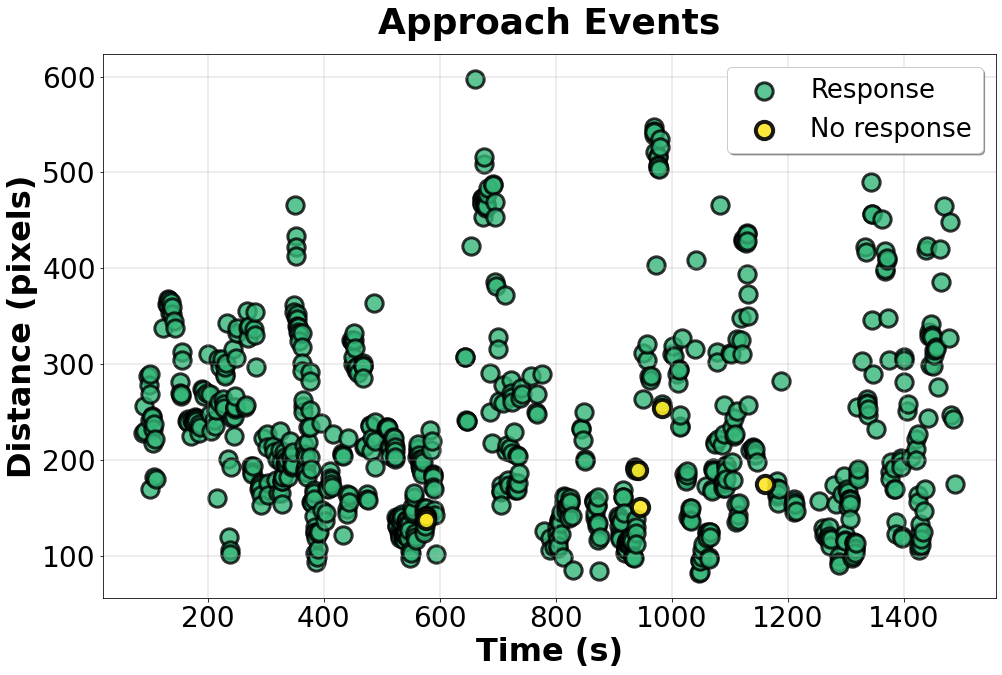

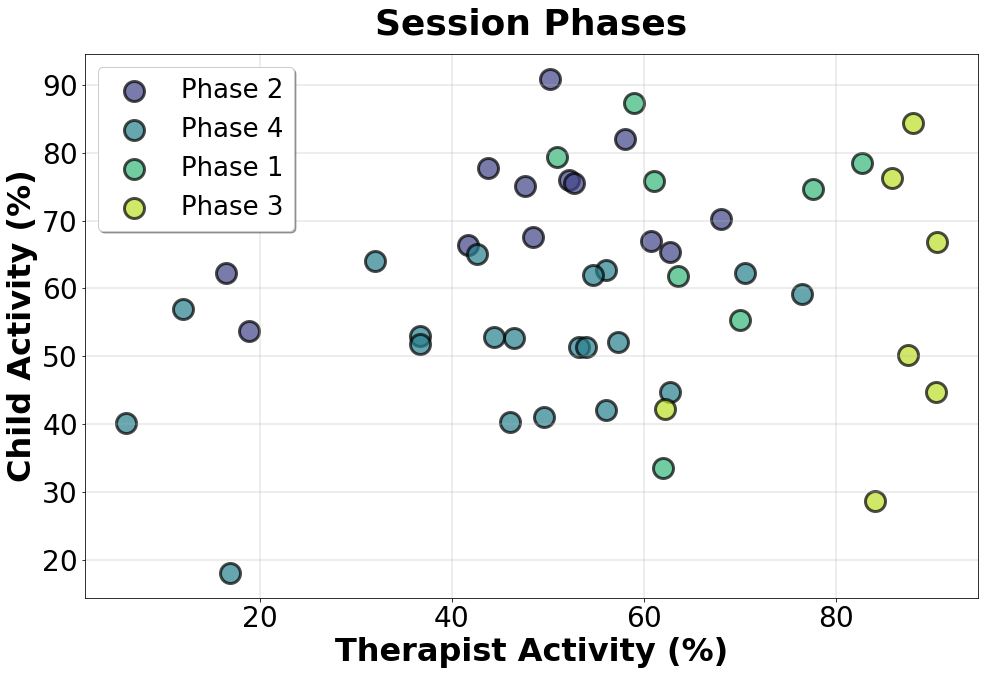


[3/4] Clustering pose patterns...
  Found persons: Child, Therapist
  → Analyzing Child...


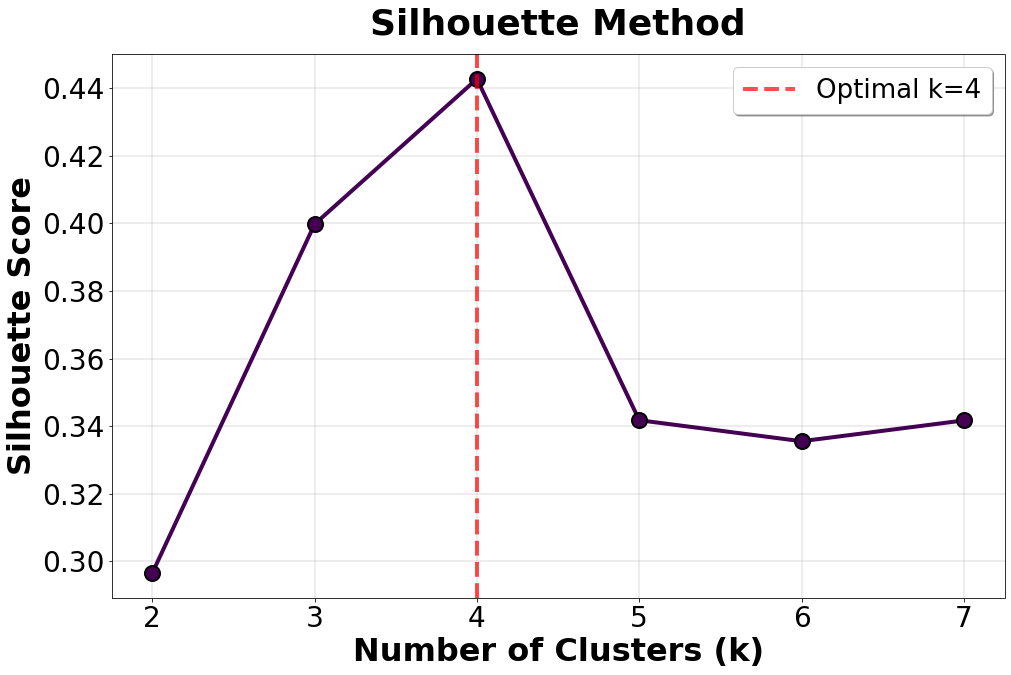

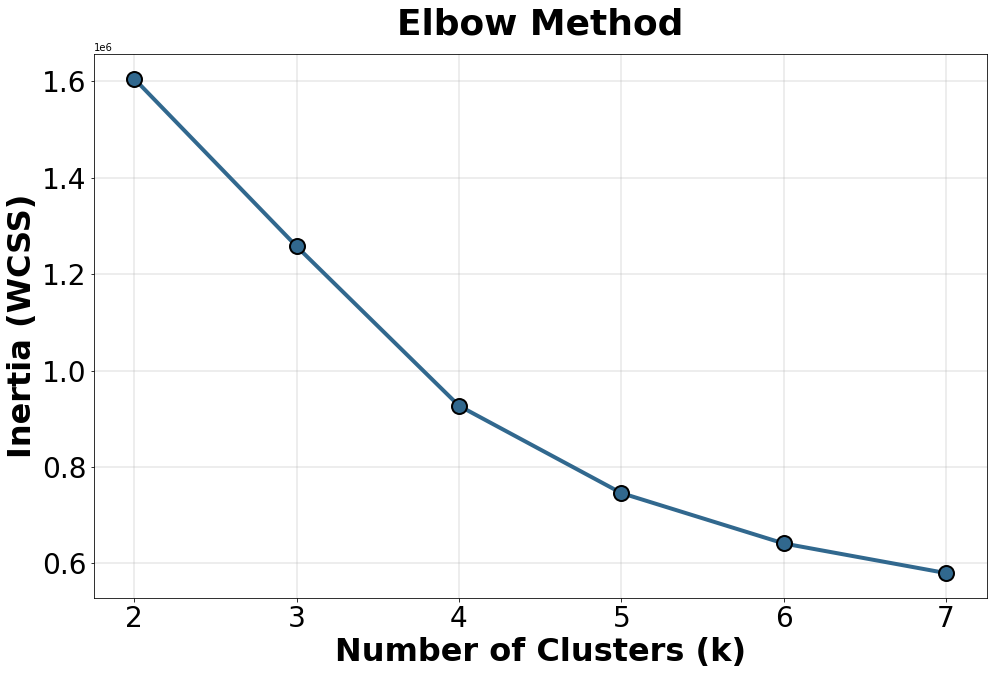

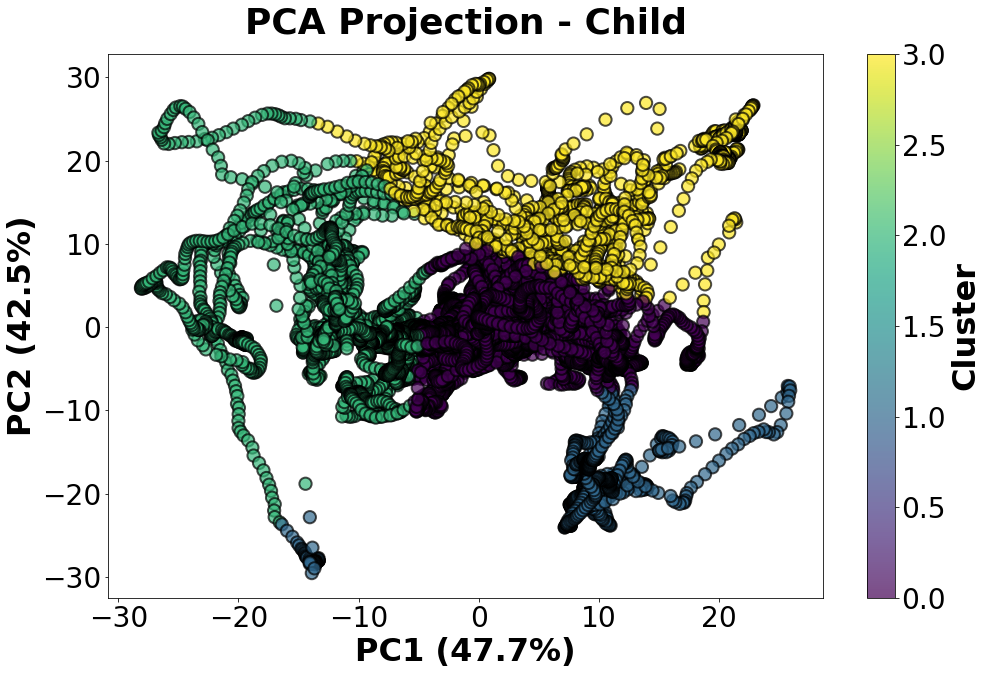

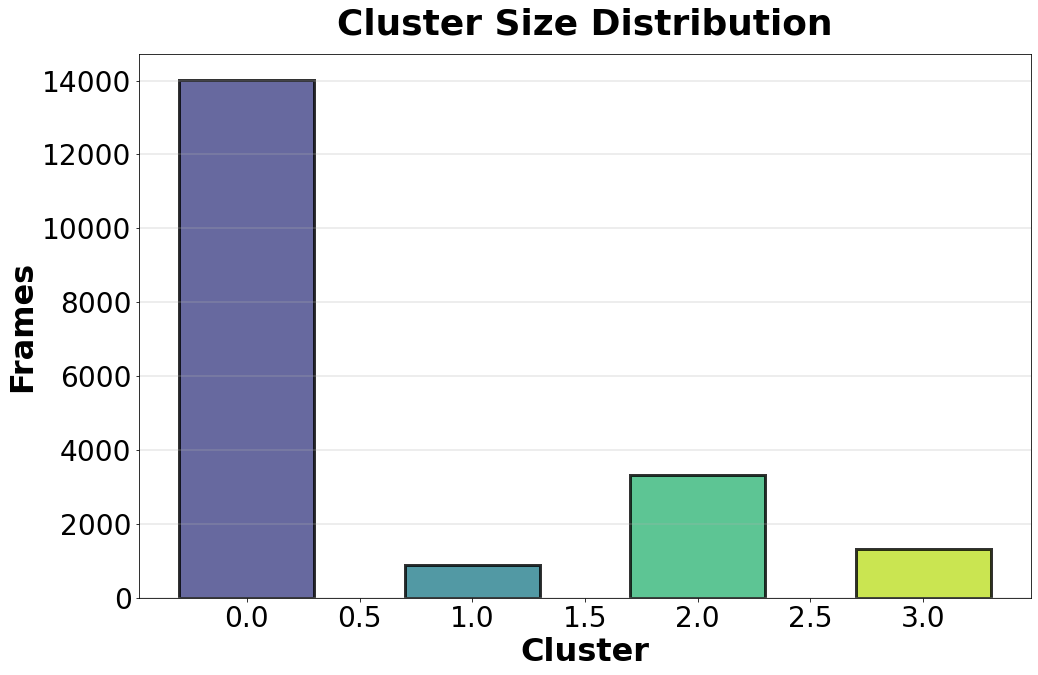

  → Analyzing Therapist...


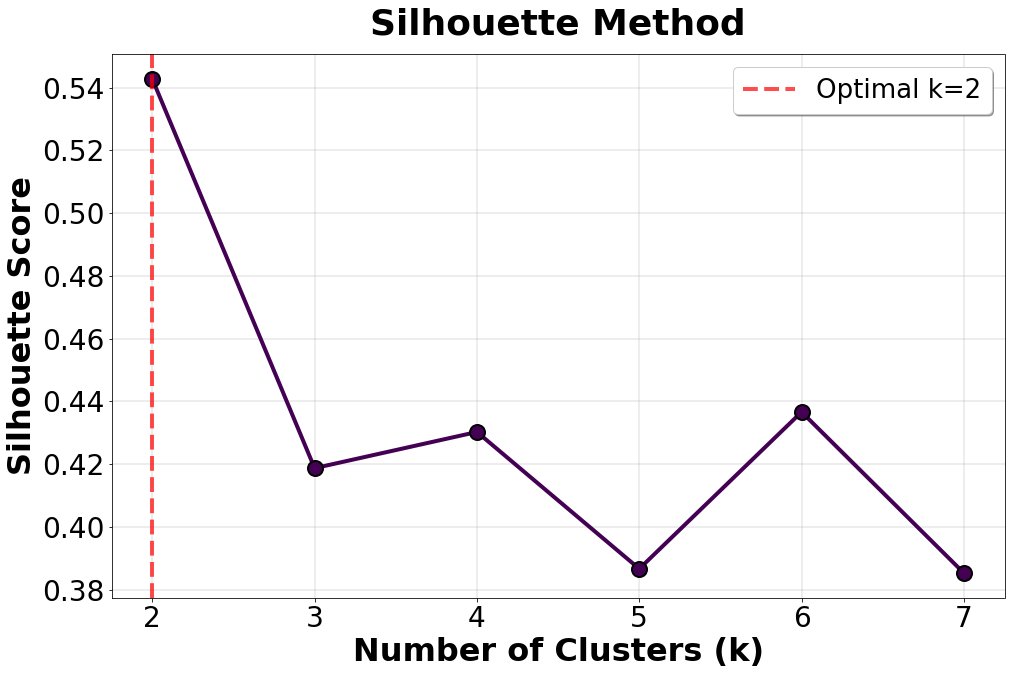

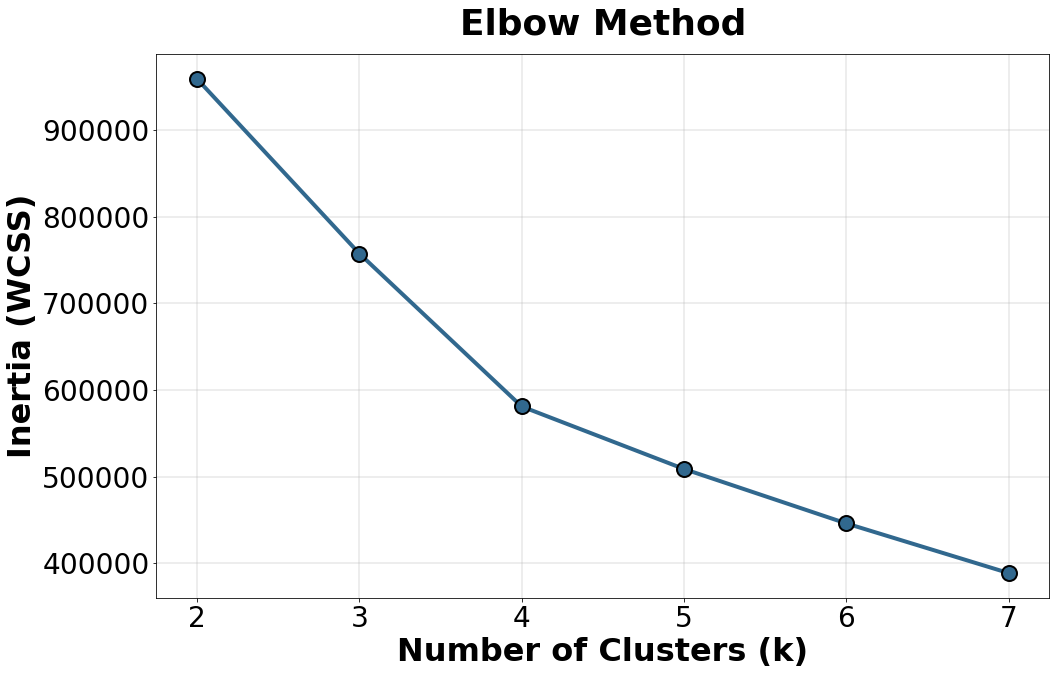

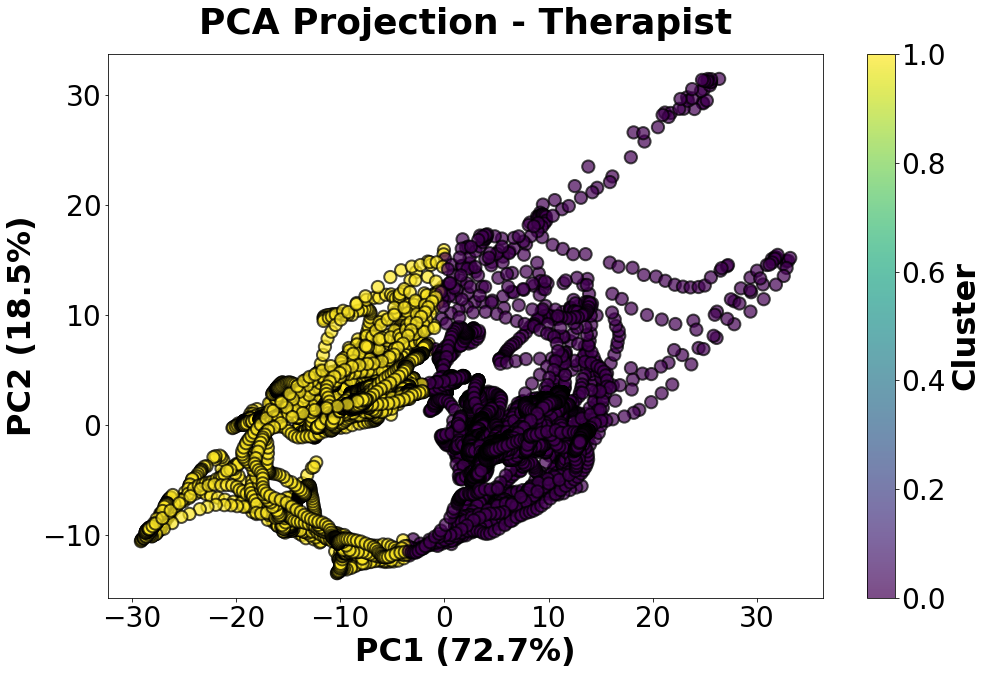

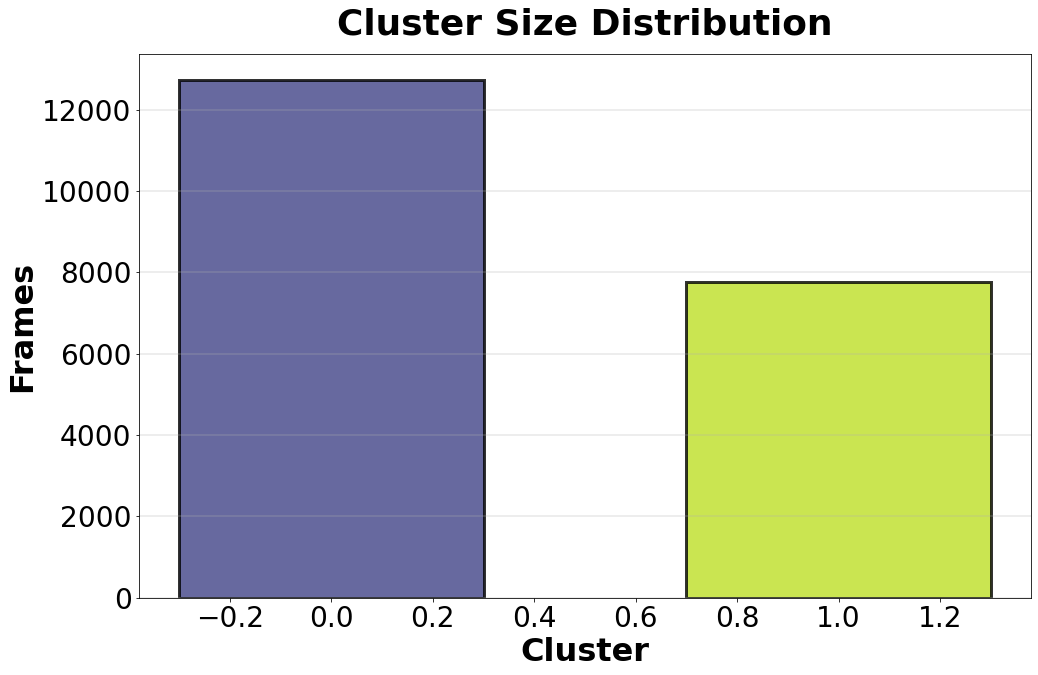


[4/4] Generating results...

ANALYSIS COMPLETE - KEY FINDINGS

Dataset: 40,013 frames analyzed

Movement Profiles:
  • Therapist: 52.0% active (mean speed: 32.1 px/frame)
  • Child: 59.9% active (mean speed: 27.1 px/frame)

Proximity: 218 px average distance (51.4% close)

Responsiveness: 99.1% (771/778 approaches)
   Mean response latency: 0.20s

Movement Coupling: r = 0.055 at 0.3s lag

Pose Clusters:
  • Child: 4 distinct posture patterns (silhouette score: 0.443)
  • Therapist: 2 distinct posture patterns (silhouette score: 0.543)

  ✓ Pose clustering completed and saved.
  → Skipping annotation processing per flag.

Combining labeled data from all projects for model training...
✓ Found existing combined dataset: combined_labeled_features.csv

--- Data Sanitization ---
✓ No rows with NaN/infinite values found.
✓ Feature values within reasonable range (max=2.94e+03).
✓ Saved sanitized data: combined_labeled_features_sanitized.csv

IMPROVED MODEL TRAINING PIPELINE

IMPROVED MODEL TR

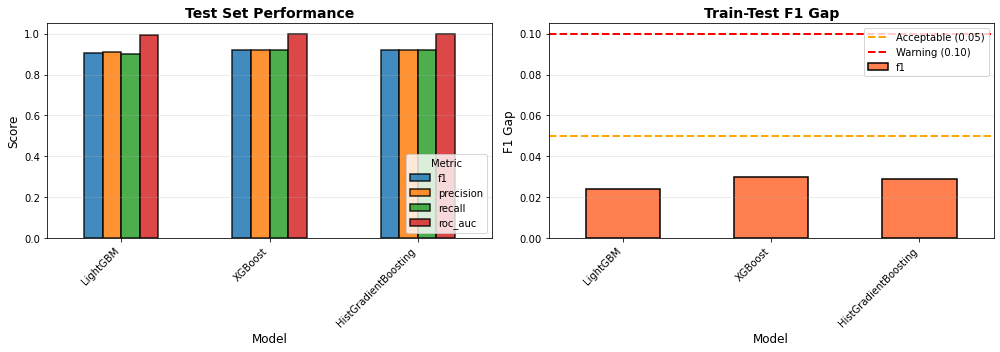


FEATURE IMPORTANCE ANALYSIS

CROSS-VALIDATION CHECK (3-Fold, Best Model Only)

Top 15 most important features (XGBoost):
  person_Child                   0.2178
  l_wrist_x_acc                  0.0350
  r_wrist_x                      0.0277
  nose_x                         0.0260
  neck_x_acc                     0.0235
  r_ankle_y                      0.0223
  r_eye_y                        0.0222
  l_ear_y                        0.0202
  nose_y_acc                     0.0202
  nose_y                         0.0185
  r_knee_y                       0.0183
  r_wrist_y_acc                  0.0171
  neck_y_acc                     0.0170
  l_hip_y                        0.0168
  r_hip_y                        0.0163
Running CV on best model: XGBoost
XGBoost: CV F1 = 0.9189 (+/- 0.0019)
Individual fold scores: ['0.9185', '0.9168', '0.9214']
✓ Low variance in CV scores - model is stable

BEST MODEL: XGBoost
Test F1 Score: 0.9209
Overfitting Status: good

✓ Saved all models and artifacts to /

Traceback (most recent call last):
  File "/tmp/ipykernel_1151513/774348596.py", line 328, in <module>
    print(f"✓ Best Model: {model_package['model_name']}")
KeyError: 'model_name'


In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import importnb


# =========================
# Options
# =========================
SKIP_POSE_CLUSTERING = True          # Skip re-run if cached exists
SKIP_ANNOTATION_PROCESSING = True    # Skip annotation alignment if combined file exists
FORCE_RECOMBINE = False               # Force re-combining labeled datasets
BASE_DATA_DIR = Path("/home/liubov/Bureau/new/processed_data")
OUTPUT_BASE_DIR = Path("/home/liubov/Bureau/new/output_data")
ANNOTATIONS_DIR = Path("/home/liubov/Bureau/new/new_annotations")
OUTPUT_BASE_DIR.mkdir(exist_ok=True, parents=True)

# =========================
# Trimming parameters
# =========================
TRIM_TIMES = {
    "11-1-2024_#9_INDIVIDUAL_[18]": (165, 1930, 15),
    "23-5-2024_#20_INDIVIDUAL_[14]": (500, 2595, 15),
    "14-3-2024_#15_INDIVIDUAL_[18]": (165, 1860, 15),
    "11-1-2024_#7_INDIVIDUAL_[14]": (170, 2160, 15),
    "10-1-2024_#6_INDIVIDUAL_[15]": (210, 2940, 15)
}
DEFAULT_TRIM = (0, None, 15)

# =========================
# Load submodules
# =========================
print("\n" + "="*70)
print("Loading analysis modules...")
print("="*70)

with importnb.Notebook():
    import PoseClustClassifier as pcc
    import AnnotLabelGenerator as alg
    import ModelTraining3 as mt

# Note: The global style is already applied, so all plots in these modules
# will automatically use the configured style

print("✓ All modules loaded")

# =========================
# Project directories
# =========================
project_dirs = [d for d in BASE_DATA_DIR.iterdir() if d.is_dir()]
print(f"\nFound {len(project_dirs)} project directories.\n{'='*70}")

# =========================
# MAIN LOOP: Per-project processing
# =========================
for project_dir in project_dirs:
    project_name = project_dir.name
    OUTPUT_DIR = OUTPUT_BASE_DIR / project_name
    OUTPUT_DIR.mkdir(exist_ok=True, parents=True)

    print(f"\n▶ Processing project: {project_name}")

    # -------------------------------
    # Load pose data
    # -------------------------------
    parquet_files = list(project_dir.glob("processed_data__*.parquet"))
    if not parquet_files:
        print(f"  ⚠ No parquet files found, skipping...")
        continue

    csv_path = project_dir / "processed_data.csv"
    if not csv_path.exists():
        df = pd.concat([pd.read_parquet(pf) for pf in parquet_files], ignore_index=True)
        df['person_label'] = df['person_label'].replace('Patient1', 'Child')
        df.to_csv(csv_path, index=False)
        print(f"  ✓ Merged and saved {len(df)} rows from {len(parquet_files)} files.")
    else:
        df = pd.read_csv(csv_path)
        print(f"  ✓ Loaded existing CSV: {csv_path.name} ({len(df)} rows)")

    # -------------------------------
    # Pose clustering
    # -------------------------------
    pose_output_path = OUTPUT_DIR / f"pose_clusters_{project_name}.parquet"
    if SKIP_POSE_CLUSTERING and pose_output_path.exists():
        pose_results = {'data': pd.read_parquet(pose_output_path)}
        print(f"  ✓ Using existing pose clustering: {pose_output_path.name}")
    else:
        print("  Running pose clustering...")
        try:
            pose_results = pcc.run_pose_clustering(data_path=project_dir, output_dir=OUTPUT_DIR)
            pose_results['data'].to_parquet(pose_output_path)
            print(f"  ✓ Pose clustering completed and saved.")
        except Exception as e:
            print(f"  ✗ Pose clustering failed: {e}")
            continue

    # -------------------------------
    # Annotation alignment
    # -------------------------------
    if SKIP_ANNOTATION_PROCESSING:
        print("  → Skipping annotation processing per flag.")
        continue

    annotation_files = list(ANNOTATIONS_DIR.glob(f"{project_name.split('[')[0]}*.txt"))
    if not annotation_files:
        print(f"  ⚠ No annotation file found, skipping label generation...")
        continue

    annotation_file = annotation_files[0]
    print(f"  ✓ Using annotation file: {annotation_file.name}")
    start_trim, end_trim, fps = TRIM_TIMES.get(project_name, DEFAULT_TRIM)

    try:
        labeled_df = alg.run_annotation_alignment_pipeline(
            annotation_file_path=annotation_file,
            features_file_path=csv_path,
            start_trim_sec=start_trim,
            end_trim_sec=end_trim
        )

        output_path = OUTPUT_DIR / "labeled_features.csv"
        labeled_df.to_csv(output_path, index=False)
        print(f"  ✓ Labeled features saved: {output_path.name}")

        # Plot annotation distribution with A0 POSTER styling
        try:
            label_counts = labeled_df['annotation_label'].value_counts().sort_values(ascending=False)
            
            # A0 poster sizing
            fig, ax = plt.subplots(figsize=(18, 10))
            
            # Create viridis colors for bars
            n_bars = len(label_counts)
            colors = plt.cm.viridis(np.linspace(0.2, 0.9, n_bars))
            
            bars = ax.bar(range(n_bars), label_counts.values, 
                         color=colors, edgecolor='black', linewidth=2, alpha=0.85)
            
            ax.set_title(f"Annotation Distribution: {project_name}", 
                        fontsize=36, weight='bold', pad=20)
            ax.set_xlabel("Annotation Label", fontsize=32, weight='bold')
            ax.set_ylabel("Count", fontsize=32, weight='bold')
            
            # Set x-tick labels HORIZONTALLY
            ax.set_xticks(range(n_bars))
            ax.set_xticklabels(label_counts.index, fontsize=28, rotation=0)
            ax.tick_params(axis='y', labelsize=28)
            
            # Add count labels on bars
            for i, (bar, count) in enumerate(zip(bars, label_counts.values)):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{count:,}',
                       ha='center', va='bottom', fontsize=24, weight='bold')
            
            ax.grid(True, alpha=0.3, axis='y', linewidth=1.5)
            plt.tight_layout()
            
            plot_path = OUTPUT_DIR / f"annotation_stats_{project_name}.png"
            plt.savefig(plot_path, dpi=300, bbox_inches='tight', facecolor='white')
            plt.close()
            
            print(f"  ✓ Saved annotation distribution plot: {plot_path.name}")
            
            # Print statistics
            print(f"  📊 Annotation statistics:")
            print(f"    - Total labeled frames: {len(labeled_df)}")
            print(f"    - Unique classes: {labeled_df['annotation_label'].nunique()}")
            print(f"    - Top 5 classes:")
            print(labeled_df['annotation_label'].value_counts().head(5).to_string())
            
        except Exception as e:
            print(f"  ⚠ Failed to plot annotation stats: {e}")

    except Exception as e:
        print(f"  ✗ Annotation alignment failed: {e}")
        continue

# =========================
# Combine labeled features
# =========================
print("\n" + "="*70)
print("Combining labeled data from all projects for model training...")
print("="*70)

combined_path = OUTPUT_BASE_DIR / "combined_labeled_features.csv"

if combined_path.exists() and not FORCE_RECOMBINE:
    print(f"✓ Found existing combined dataset: {combined_path.name}")
    if not SKIP_ANNOTATION_PROCESSING:
        print("  → Updating combined dataset with new labeled features...")
        FORCE_RECOMBINE = True

if not combined_path.exists() or FORCE_RECOMBINE:
    labeled_files = list(OUTPUT_BASE_DIR.glob("*/labeled_features.csv"))
    
    if not labeled_files:
        print("⚠ No labeled feature files found — cannot combine.")
        exit()
    
    print(f"✓ Found {len(labeled_files)} labeled feature files.")
    
    all_dfs = []
    for f in labeled_files:
        try:
            df_part = pd.read_csv(f)
            df_part["project_name"] = f.parent.name
            all_dfs.append(df_part)
            print(f"  ✓ Loaded: {f.parent.name} ({len(df_part)} rows)")
        except Exception as e:
            print(f"  ⚠ Skipping {f.name}: {e}")

    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        print(f"✓ Combined dataset shape: {combined_df.shape}")
        
        combined_df.to_csv(combined_path, index=False)
        print(f"✓ Saved combined labeled data to: {combined_path}")
        
        # Plot global annotation distribution with A0 POSTER styling
        try:
            label_counts = combined_df['annotation_label'].value_counts().sort_values(ascending=False)
            
            # A0 poster sizing - EXTRA WIDE for horizontal labels
            fig, ax = plt.subplots(figsize=(24, 12))
            
            # Create viridis colors for bars
            n_bars = len(label_counts)
            colors = plt.cm.viridis(np.linspace(0.2, 0.9, n_bars))
            
            bars = ax.bar(range(n_bars), label_counts.values, 
                         color=colors, edgecolor='black', linewidth=2.5, alpha=0.85, width=0.7)
            
            ax.set_title("Global Annotation Distribution (All Projects)", 
                        fontsize=40, weight='bold', pad=25)
            ax.set_xlabel("Annotation Label", fontsize=36, weight='bold')
            ax.set_ylabel("Total Count", fontsize=36, weight='bold')
            
            # Set x-tick labels HORIZONTALLY
            ax.set_xticks(range(n_bars))
            ax.set_xticklabels(label_counts.index, fontsize=30, rotation=0)
            ax.tick_params(axis='y', labelsize=30)
            
            # Add count labels on bars
            for i, (bar, count) in enumerate(zip(bars, label_counts.values)):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{count:,}',
                       ha='center', va='bottom', fontsize=26, weight='bold')
            
            ax.grid(True, alpha=0.3, axis='y', linewidth=1.5)
            plt.tight_layout()
            
#             global_plot_path = OUTPUT_BASE_DIR / "global_annotation_distribution.png"
#             plt.savefig(global_plot_path, dpi=300, bbox_inches='tight', facecolor='white')
            plt.close()
            
#             print(f"✓ Saved global annotation distribution: {global_plot_path.name}")
            
            # Also save individual class statistics
#             stats_path = OUTPUT_BASE_DIR / "annotation_statistics.txt"
#             with open(stats_path, 'w') as f:
#                 f.write("="*70 + "\n")
#                 f.write("GLOBAL ANNOTATION STATISTICS\n")
#                 f.write("="*70 + "\n\n")
#                 f.write(f"Total labeled frames: {len(combined_df):,}\n")
#                 f.write(f"Unique classes: {combined_df['annotation_label'].nunique()}\n")
#                 f.write(f"Number of projects: {combined_df['project_name'].nunique()}\n\n")
#                 f.write("Class Distribution:\n")
#                 f.write("-"*70 + "\n")
#                 for label, count in label_counts.items():
#                     percentage = (count / len(combined_df)) * 100
#                     f.write(f"{label:15s}: {count:6,} ({percentage:5.2f}%)\n")
            
#             print(f"✓ Saved annotation statistics: {stats_path.name}")
            
        except Exception as e:
            print(f"  ⚠ Failed to plot global distribution: {e}")
    else:
        print("✗ No valid dataframes to combine")
        exit()

# =========================
# Data Sanitization
# =========================
print("\n--- Data Sanitization ---")
combined_df = pd.read_csv(combined_path)

# Handle infinite values
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
before_drop = len(combined_df)
combined_df.dropna(inplace=True)
after_drop = len(combined_df)
dropped = before_drop - after_drop

if dropped > 0:
    print(f"✓ Dropped {dropped} rows with NaN/infinite values.")
else:
    print(f"✓ No rows with NaN/infinite values found.")

# Check feature ranges
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
max_val = combined_df[numeric_cols].abs().max().max()
print(f"✓ Feature values within reasonable range (max={max_val:.2e}).")

# Save sanitized data
sanitized_path = OUTPUT_BASE_DIR / "combined_labeled_features_sanitized.csv"
combined_df.to_csv(sanitized_path, index=False)
print(f"✓ Saved sanitized data: {sanitized_path.name}")

# =========================
# MODEL TRAINING
# =========================
print("\n" + "="*70)
print("MODEL TRAINING")
print("="*70)

try:
    results = {'labeled_features': combined_df}
    model_package = mt.main(results, output_dir=OUTPUT_BASE_DIR)
    
    print(f"\n✓ Combined model training complete.")
    print(f"✓ Best Model: {model_package['model_name']}")
    print(f"✓ Final F1 Score: {model_package['f1_score']:.4f}")
    
    # Save model summary
    summary_path = OUTPUT_BASE_DIR / "model_training_summary.txt"
    with open(summary_path, 'w') as f:
        f.write("="*70 + "\n")
        f.write("MODEL TRAINING SUMMARY\n")
        f.write("="*70 + "\n\n")
        f.write(f"Best Model: {model_package['model_name']}\n")
        f.write(f"F1 Score: {model_package['f1_score']:.4f}\n")
        f.write(f"Training data shape: {combined_df.shape}\n")
        f.write(f"Number of classes: {combined_df['annotation_label'].nunique()}\n")
        f.write(f"Number of projects: {combined_df['project_name'].nunique()}\n")
    
    print(f"✓ Saved model summary: {summary_path.name}")
    
except Exception as e:
    print(f"✗ Combined model training failed: {e}")
    import traceback
    traceback.print_exc()

# =========================
# Final Summary
# =========================
print("\n" + "="*70)
print("PIPELINE COMPLETE - SUMMARY")
print("="*70)
print(f"✓ All projects processed")
print(f"✓ Results saved in: {OUTPUT_BASE_DIR}")

print("="*70)